In [1]:
import pandas as pd
import numpy as np
import pathlib
import matplotlib.pyplot as plt
import seaborn as sns

import os
from tqdm import tqdm

maindir = "/Volumes/HNSD02/data"
PROJECT = "MRD_GW_UMI_Phuc_HG19"
data_version = "20240606"
path_to_main_input = os.path.join(maindir, PROJECT, data_version)
metadata_wgs = pd.read_excel(os.path.join(maindir, PROJECT, "metadata", "metadata_WGS_20240606.xlsx"))
metadata_mrd = pd.read_excel(os.path.join(maindir, PROJECT, "metadata", "metadata_MRD_20240606.xlsx"))

wgs_samples = metadata_wgs["SampleID"].values
all_samples = [item for item in pathlib.Path(path_to_main_input).glob("*")]
all_flen_files = [item for item in pathlib.Path(path_to_main_input).rglob("*/*_GWfeature_flen.csv")]
maindf = pd.DataFrame(data = range(0, 301), columns = ["size"])
for item in tqdm([item for item in all_flen_files if item.name.split("_")[0].split("-")[1] in wgs_samples]):
    tmpdf = pd.read_csv(item)[["Unnamed: 0", "freq"]]
    tmpdf.columns = ["size", item.name.split("_")[0].split("-")[1]]
    maindf = maindf.merge(tmpdf, right_on = "size", left_on= "size")


100%|██████████| 644/644 [00:01<00:00, 366.45it/s]


In [2]:
metadata_wgs

,SampleID,Label,ichorCNA,Run
0,K0AAAA01NB,Control,0.00000,R5044
1,K0AAAA02NB,Control,0.00000,R5044
2,K0AAAA03NB,Control,0.00000,R5044
3,K0AAAA04NB,Control,0.00000,R5044
4,K0AAAA06NB,Control,0.00000,R5044
...,...,...,...,...
639,ZMG049NB,Gastric,0.03375,R5434
640,ZMG060NB,Gastric,0.00000,R5434
641,ZMG064NB,Gastric,0.00000,R5434
642,ZMG125NB,Gastric,0.00000,R5434


/Users/hieunguyen/miniconda3/envs/pytorch/lib/python3.8/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


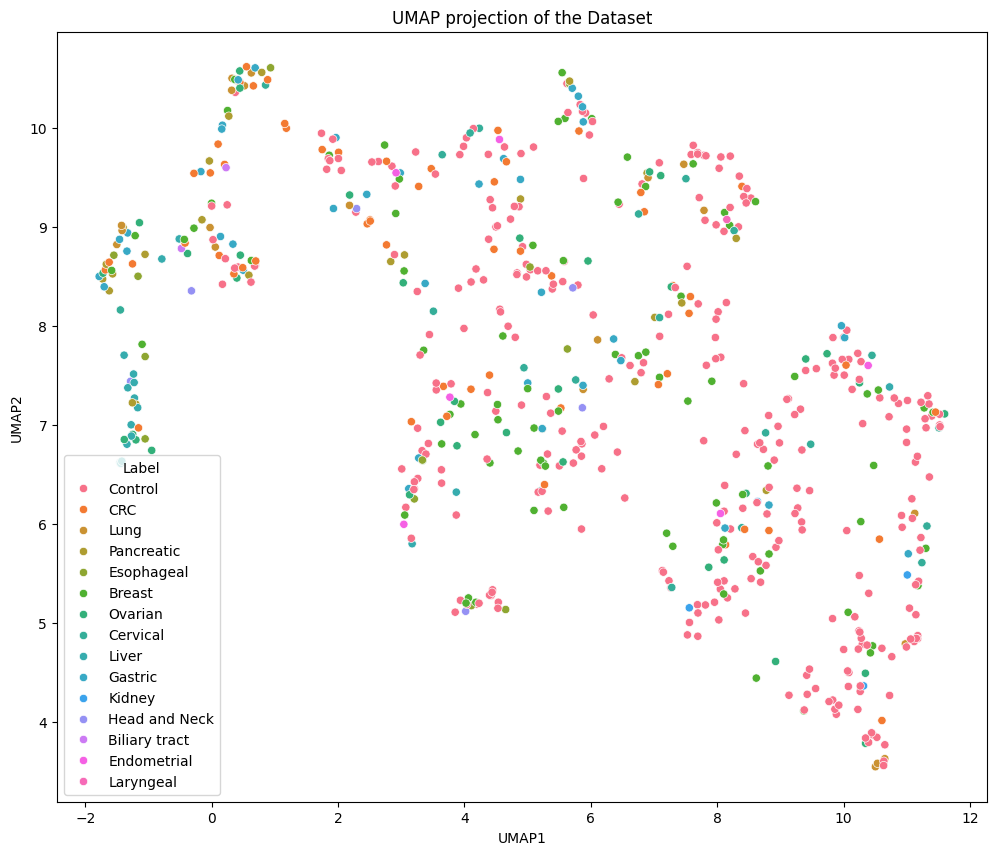

In [3]:
import umap
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(maindf.drop("size", axis = 1).to_numpy().T)
umapdf = pd.DataFrame(data = embedding, columns = ["UMAP1", "UMAP2"])
umapdf["SampleID"] = [item for item in maindf.columns if item != "size"]
umapdf["Run"] = umapdf["SampleID"].apply(lambda x: metadata_wgs[metadata_wgs["SampleID"] == x]["Run"].values[0])
umapdf["Label"] = umapdf["SampleID"].apply(lambda x: metadata_wgs[metadata_wgs["SampleID"] == x]["Label"].values[0])
plt.figure(figsize=(12, 10))
sns.scatterplot(data = umapdf, x = "UMAP1", y = "UMAP2", hue = "Label")
plt.title('UMAP projection of the Dataset')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.show()